In [21]:
import os
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd


### 1. Data exploration:

In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [23]:
# Show details of the dataset
# Show the size of the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


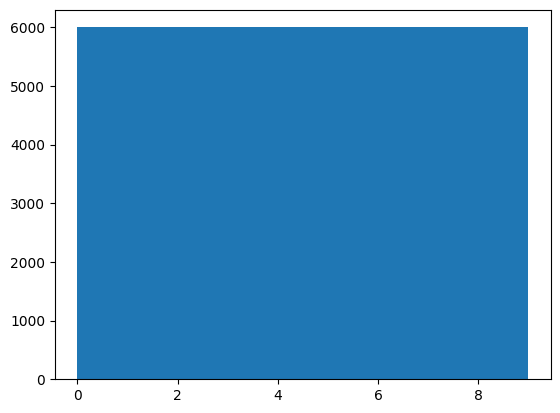

In [24]:
# Show the distribution of the classes
plt.hist(y_train, bins=10)
plt.show()

0 : T-shirt/top


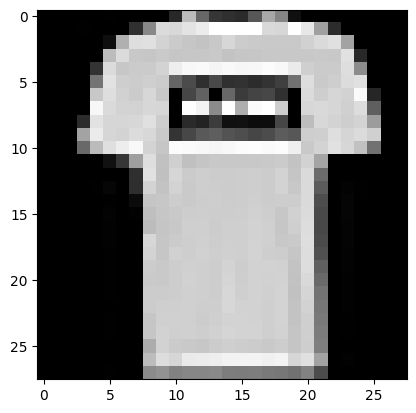

1 : Trouser


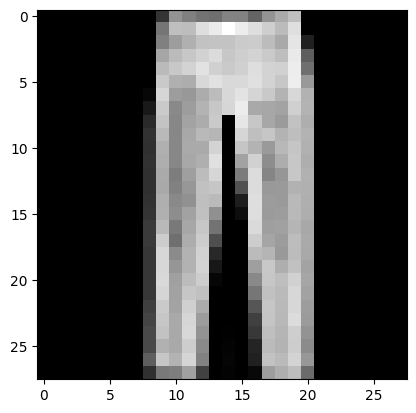

2 : Pullover


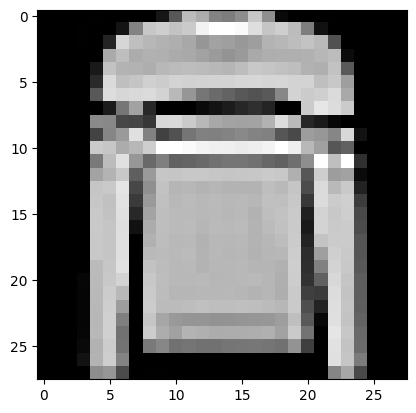

3 : Dress


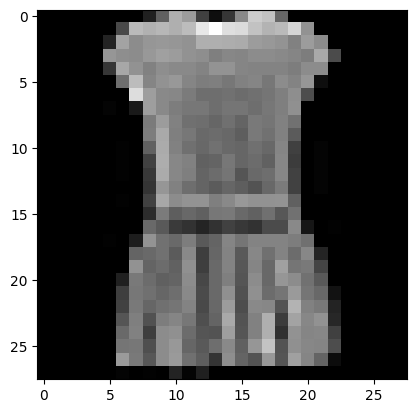

4 : Coat


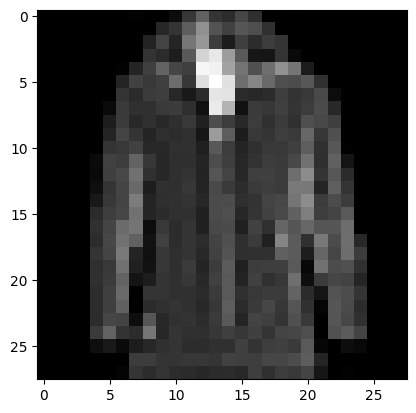

5 : Sandal


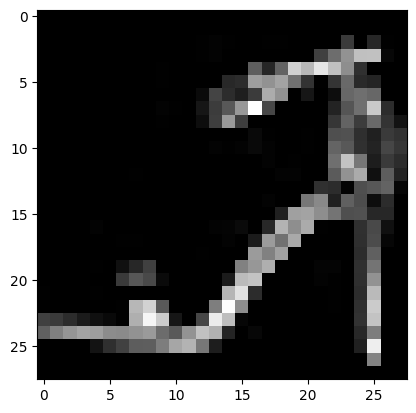

6 : Shirt


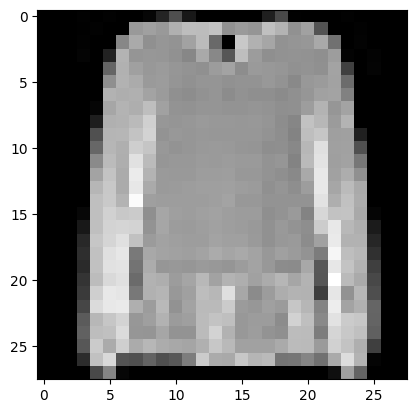

7 : Sneaker


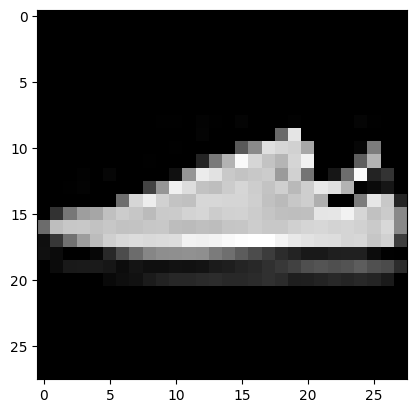

8 : Bag


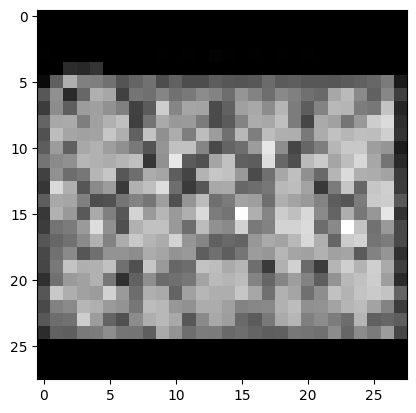

9 : Ankle boot


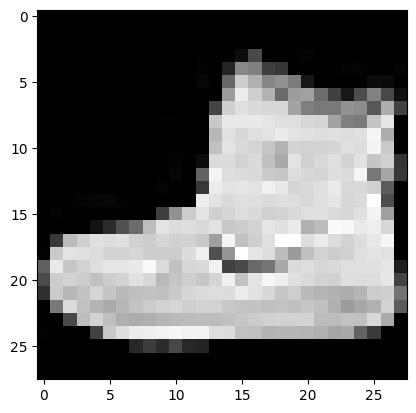

In [25]:
# Plot an image of every class
classes = "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
for i in range(10):
    plt.imshow(x_train[y_train == i][0], cmap='gray')
    print(y_train[y_train == i][0], ":", classes[i])
    plt.show()

In [26]:
# Select a classification metric, such as accuracy or another metric you find more suitable for the problem
# Accuracy is a good metric for this problem because it is a balanced dataset

### 2. Pre-processing:

In [27]:
# Set a random seed for NumPy and Keras
np.random.seed(0)
tf.random.set_seed(0)

In [28]:
# Use the default splits for testing and training, and extract a validation dataset from the training set
# Data is already split into training and testing
# Splitting the training data into training and validation 4:1 ratio
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [29]:
# Normalize the data to ensure compatibility with the Keras neural networks interface.
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

### 3. Define your initial model:

In [30]:
# Build a Keras classifier model and print its initial architecture by calling the model’s summary method
model = models.Sequential()
# We add a convolutional layer that has 28 3x3 filters with
# relu activation function.
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# We add a pooling layer that uses the maximum function
# where the filter size is 2x2.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,642 (584.54 KB)

 Trainable params: 149,642 (584.54 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Choose a loss function for training the model and reasonable starting hyperparameter values
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 4. Train your model:

In [13]:
# Train your model for ten epochs using the training split of the FashionMnist dataset
#history = model.fit(x_train, y_train, epochs=10, 
#                    validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7290 - loss: 0.7292 - val_accuracy: 0.8632 - val_loss: 0.3791
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8686 - loss: 0.3605 - val_accuracy: 0.8788 - val_loss: 0.3438
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8902 - loss: 0.3030 - val_accuracy: 0.8886 - val_loss: 0.3236
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9003 - loss: 0.2667 - val_accuracy: 0.8945 - val_loss: 0.3036
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9136 - loss: 0.2353 - val_accuracy: 0.8967 - val_loss: 0.2974
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9232 - loss: 0.2092 - val_accuracy: 0.8972 - val_loss: 0.3111
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9302 - loss: 0.1866 - val_accuracy: 0.8997 - val_loss: 0.3088
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9387 -

313/313 - 2s - 8ms/step - accuracy: 0.1467 - loss: 2.3018
0.14669999480247498


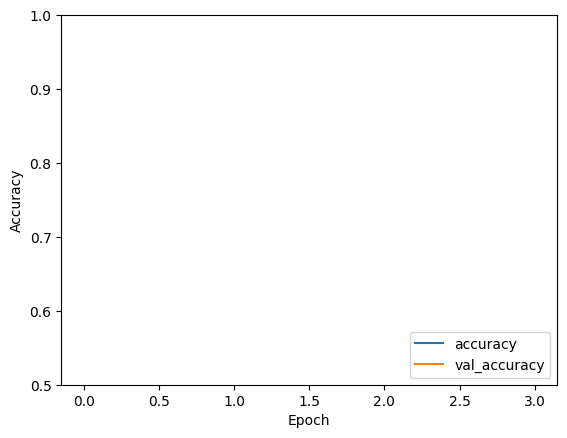

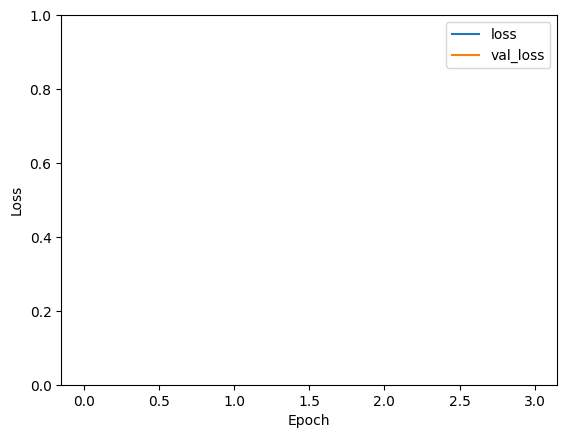

In [33]:
# Ensure that the model runs without errors and that the loss decreases more or less smoothly
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)
plt.show()

# Plot the loss of the model on the test and validation sets
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

5. Hyperparameter tuning:

In [59]:
# Create a new improved model by tuning and hyperparameters, use the same model as earlier
# Build a Keras classifier model and print its initial architecture by calling the model’s summary method
def create_model(dropout_rate=0.2):
    model_creation = models.Sequential()
    # We add a convolutional layer that has 28 3x3 filters with
    # relu activation function.
    model_creation.add(layers.Input(shape=(28, 28, 1)))
    model_creation.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_creation.add(layers.Dropout(dropout_rate))  # Add Dropout after pooling layer for regularization
    # We add a pooling layer that uses the maximum function
    # where the filter size is 2x2.
    model_creation.add(layers.MaxPooling2D((2, 2)))
    model_creation.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_creation.add(layers.MaxPooling2D((2, 2)))
    model_creation.add(layers.Dropout(dropout_rate))  # Add Dropout after pooling layer for regularization
    model_creation.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_creation.add(layers.Flatten())
    model_creation.add(layers.Dense(128, activation='relu'))
    model_creation.add(layers.Dropout(2*dropout_rate))  # Add Dropout after dense layer for regularization
    model_creation.add(layers.Dense(10))
    return model_creation

In [60]:
# Implement the Keras EarlyStopping callback.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=0.0001,
    restore_best_weights=True,
)

In [61]:
# Select two hyperparameters and conduct a rough parameter search to fine-tune 
learning_rate = 0.00001  # This is a hyperparameter
batch_size = 32  # Another hyperparameter

In [63]:
results = pd.DataFrame(columns=['filters', 'kernel_size', 'pool_size', 'dense_units', 'accuracy', 'loss', 'batch_size', 'learning_rate'])
for batch_size in [32,64,128,256]:
    for learning_rate in [0.01, 0.001, 0.0001, 0.00001]:
        print()
        print("Batch size: ", batch_size)
        print("Learning rate: ", learning_rate)
        # Implement the Keras EarlyStopping callback.
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            min_delta=0.0001,
            restore_best_weights=True,
        )
        model = create_model(0.2)
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = batch_size, callbacks=[early_stopping])
        test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
        new_data = pd.DataFrame({'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'accuracy': test_acc,'loss': test_loss, 'batch_size':batch_size, 'learning_rate':learning_rate, 'history':history, 'model': model}, index=[0]) 
        results = pd.concat([results, new_data], ignore_index=True)


Batch size:  32
Learning rate:  0.01
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6796 - loss: 0.8782 - val_accuracy: 0.8207 - val_loss: 0.4700
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.7881 - loss: 0.5805 - val_accuracy: 0.8248 - val_loss: 0.4647
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.7897 - loss: 0.5788 - val_accuracy: 0.8224 - val_loss: 0.4568
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.7927 - loss: 0.5666 - val_accuracy: 0.8239 - val_loss: 0.4484
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7922 - loss: 0.5698 - val_accuracy: 0.8208 - val_loss: 0.4675
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7943 - loss: 0.5646 - val_accuracy: 0.8163 - val_loss: 0.4926
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7879 - loss: 0.5775 - val_accuracy: 0.8229 - val_loss: 0.4712
313/313 - 1s - 5ms/step - accuracy: 0.

C:\Users\elsha\AppData\Local\Temp\ipykernel_22828\2209253682.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_data], ignore_index=True)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6895 - loss: 0.8499 - val_accuracy: 0.8547 - val_loss: 0.3894
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8487 - loss: 0.4180 - val_accuracy: 0.8784 - val_loss: 0.3243
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8705 - loss: 0.3555 - val_accuracy: 0.8834 - val_loss: 0.3095
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8829 - loss: 0.3201 - val_accuracy: 0.8913 - val_loss: 0.2913
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8910 - loss: 0.2977 - val_accuracy: 0.8867 - val_loss: 0.3028
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8972 - loss: 0.2773 - val_accuracy: 0.8984 - val_loss: 0.2710
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9030 - loss: 0.2628 - val_accuracy: 0.8992 - val_loss: 0.2637
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9087 -

In [65]:
# print(results.iloc[0])
# store the model of line 9 in a variable
model = results.iloc[5]['model']
history = results.iloc[5]['history']
print(model)
print(results)

<Sequential name=sequential_58, built=True>
   filters kernel_size pool_size dense_units  accuracy      loss batch_size  \
0       64           3         2         128    0.8168  0.475024         32   
1       64           3         2         128    0.9021  0.270229         32   
2       64           3         2         128    0.8776  0.335727         32   
3       64           3         2         128    0.7869  0.602361         32   
4       64           3         2         128    0.8391  0.424029         64   
5       64           3         2         128    0.9083  0.256093         64   
6       64           3         2         128    0.8643  0.372535         64   
7       64           3         2         128    0.7638  0.662734         64   
8       64           3         2         128    0.8671  0.359300        128   
9       64           3         2         128    0.9030  0.267403        128   
10      64           3         2         128    0.8524  0.410383        128   
11      

In [66]:
# Save the model with the best performance
model.save("model/final_classifier_regularized.h5")
print("Model saved as 'model/final_classifier_regularized.h5'")

Model saved as 'model/final_classifier_regularized.h5'


313/313 - 1s - 5ms/step - accuracy: 0.9083 - loss: 0.2561
0.90829998254776


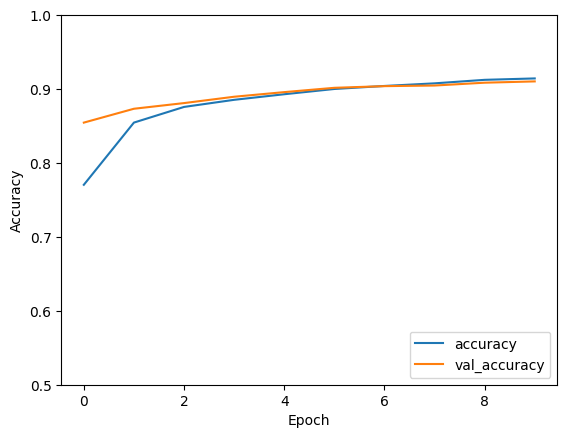

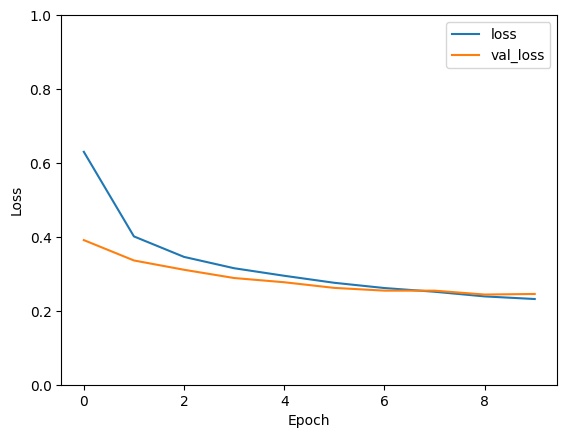

In [67]:
# Ensure that the model runs without errors and that the loss decreases more or less smoothly
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)
plt.show()

# Plot the loss of the model on the test and validation sets
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

In [68]:
# Save the DataFram as a CSV file and include it in your package
results.to_csv('csv/classifier_with_regularization.csv')

NameError: name 'model' is not defined